In [139]:
import pandas as pd
import seaborn as sns
import numpy
# Cargar el dataset
df = sns.load_dataset('penguins')
df


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [140]:
#1 ¿Cuántas especies diferentes de pingüinos hay en el dataset?

sp=df['species'].value_counts()
sp

,count
species,
Adelie,152
Gentoo,124
Chinstrap,68


In [141]:
#2 ¿Cuál es la longitud media del pico de los pingüinos de la especie Adelie?

prom_bill = df[df['species'] == 'Adelie']['bill_length_mm'].mean()  #.mean() para calcular el promedio
print("La longitud media del pico en la especie Adelie es", round(prom_bill,2),"mm")

La longitud media del pico en la especie Adelie es 38.79 mm


In [142]:
#3 ¿Cuál es la masa corporal promedio de los pingüinos de la especie Gentoo?

prom_mass = df[df['species'] == 'Chinstrap']['body_mass_g'].mean()
print("La masa promedio de la especie Gentoo es",round(prom_mass,2),"gramos")

La masa promedio de la especie Gentoo es 3733.09 gramos


In [143]:
#4 ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos?

lp=df['bill_length_mm']
mp=df['body_mass_g']
corml= lp.corr(mp)  #.corr() halla el coeficiente de correlacion de Pearson

print("La correlación entre la longitud del pico y la masa de los pingüinos es positiva y tiene un valor de",corml)


La correlación entre la longitud del pico y la masa de los pingüinos es positiva y tiene un valor de 0.5951098244376303


In [144]:
#5 ¿Cuál es la isla con mayor número de pingüinos en el dataset?

isl=df['island'].value_counts()
isl


,count
island,
Biscoe,168
Dream,124
Torgersen,52


In [145]:
#6 ¿Cuál es la desviación estándar de la longitud de la aleta de los pingüinos de la especie Chinstrap?

desv_flip = df[df['species'] == 'Gentoo']['flipper_length_mm'].std()  #.std() para hallar la desviacion estandar
print("La desviacion estandar de la longitud de la aleta en la especie Chinstrap es",round(desv_flip,2))


La desviacion estandar de la longitud de la aleta en la especie Chinstrap es 6.48


In [146]:
#7 ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?

bill_mayor=df['bill_length_mm'].max() #.max() halla el valor maximo


spe_mayor=df.loc[df['bill_length_mm'] == bill_mayor, 'species'].values[0]
print("El pico mayor mide",bill_mayor,"mm y pertenece a la especie",spe_mayor)

El pico mayor mide 59.6 mm y pertenece a la especie Gentoo


In [147]:
#8 ¿Cuál es la proporción de machos y hembras en la especie Adelie?

prop=df[df['species']=='Adelie']['sex'].value_counts()
prop



,count
sex,
Male,73
Female,73


**RELACION 1 A 1 ENTRE MACHOS Y HEMBRAS DE LA ESPECIE ADELIE**

In [148]:
#9 ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?

correlaciones = df.groupby('species').apply(lambda x: x['bill_length_mm'].corr(x['body_mass_g'])) #df.groupby para agrupar datos del dataframe

print(correlaciones)



species
Adelie       0.548866
Chinstrap    0.513638
Gentoo       0.669166
dtype: float64


**Existe una correlación positiva para cada una de las especies, es decir, cuando la longitud del pico aumenta entonces la masa del pingüino tambien aumenta**

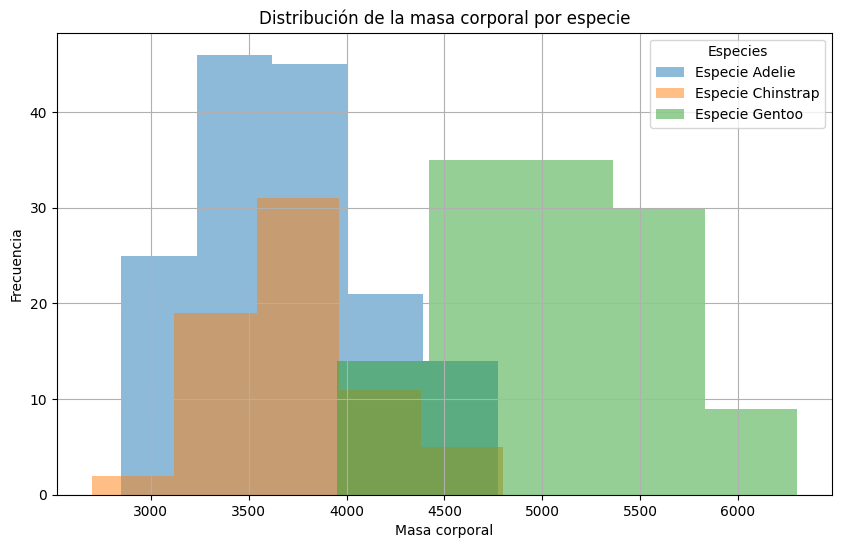

In [149]:
#10 ¿Cuál es la distribución de la masa corporal entre las especies de pingüinos?

import matplotlib.pyplot as plt

spec=df['species'].unique() #Obtener las especies

plt.figure(figsize=(10,6))

#Graficar un histograma para cada especie
for i in spec:
    subset = df[df['species'] == i]
    plt.hist(subset['body_mass_g'], alpha=0.5, label=f'Especie {i}', bins=5)

plt.title('Distribución de la masa corporal por especie')
plt.xlabel('Masa corporal')
plt.ylabel('Frecuencia')
plt.legend(title='Especies')
plt.grid(True)
plt.show()


In [150]:
# Tambien usamos .describe() para conocer las estadisticas descriptivas de la distribucion
descr = df.groupby('species')['body_mass_g'].describe()

print("Una descripcion mas detalla de los grupos es: \n",descr)

Una descripcion mas detalla de los grupos es: 
            count         mean         std     min     25%     50%     75%  \
species                                                                     
Adelie     151.0  3700.662252  458.566126  2850.0  3350.0  3700.0  4000.0   
Chinstrap   68.0  3733.088235  384.335081  2700.0  3487.5  3700.0  3950.0   
Gentoo     123.0  5076.016260  504.116237  3950.0  4700.0  5000.0  5500.0   

              max  
species            
Adelie     4775.0  
Chinstrap  4800.0  
Gentoo     6300.0  


In [151]:
#11 ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?

max=df.groupby('species').apply(lambda x: x['flipper_length_mm'].max())
print(" La longituud máxima de la aleta de cada especie en mm es:\n",max)

 La longituud máxima de la aleta de cada especie en mm es:
 species
Adelie       210.0
Chinstrap    212.0
Gentoo       231.0
dtype: float64


In [152]:
min=df.groupby('species').apply(lambda x: x['flipper_length_mm'].min())
print(" La longituud mínima de la aleta de cada especie en mm es:\n",min)

 La longituud mínima de la aleta de cada especie en mm es:
 species
Adelie       172.0
Chinstrap    178.0
Gentoo       203.0
dtype: float64


In [153]:
#12 ¿Cuántos pingüinos tienen una masa corporal superior a 5000 gramos?

conteo1=df['body_mass_g']>5000
conteo2=conteo1.sum() #.sum() para saber cuantos cumplen la condicion anterior

print("El número de pingüinos que superan los 5 mil gramos son ",conteo2)


El número de pingüinos que superan los 5 mil gramos son  61


In [154]:
#13 ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?


#Toco hacerlo uno por uno, viendo como varía  la longitud del pico en cada isla por cada especie
# Cabe acotar que hay algunas especies las cuales no habitan en ciertas islas

paila1=df[(df['species']=='Adelie') & (df['island']=='Biscoe') ]
var1=paila1['bill_length_mm'].var()
print("La variacion de la especie Adelie en la isla Biscoe es",round(var1,2))

paila2=df[(df['species']=='Adelie') & (df['island']=='Dream') ]
var2=paila2['bill_length_mm'].var()
print("La variacion de la especie Adelie en la isla Dream es",round(var2,2))

paila3=df[(df['species']=='Adelie') & (df['island']=='Torgersen') ]
var3=paila3['bill_length_mm'].var()
print("La variacion de la especie Adelie en la isla Torgersen es",round(var3,2))

paila4=df[(df['species']=='Gentoo') & (df['island']=='Biscoe') ]
var4=paila4['bill_length_mm'].var()
print("La variacion de la especie Gentoo en la isla Biscoe es",round(var4,2))

"""paila5=df[(df['species']=='Gentoo') & (df['island']=='Dream') ]
var5=paila5['bill_length_mm'].var()
print(var5)

paila6=df[(df['species']=='Gentoo') & (df['island']=='Torgersen') ]
var6=paila6['bill_length_mm'].var()
print(var6)

paila7=df[(df['species']=='Chinstrap') & (df['island']=='Biscoe') ]
var7=paila7['bill_length_mm'].var()
print(var7)"""

paila8=df[(df['species']=='Chinstrap') & (df['island']=='Dream') ]
var8=paila8['bill_length_mm'].var()
print("La variacion de la especie Chinstrap en la isla Dream es",round(var8,2))

#paila9=df[(df['species']=='Chinstrap') & (df['island']=='Torgersen') ]
#var9=paila9['bill_length_mm'].var()
#print(var9)

print("Para los demas casos no se encontraron poblaciones de pingüinos")


La variacion de la especie Adelie en la isla Biscoe es 6.15
La variacion de la especie Adelie en la isla Dream es 6.08
La variacion de la especie Adelie en la isla Torgersen es 9.15
La variacion de la especie Gentoo en la isla Biscoe es 9.5
La variacion de la especie Chinstrap en la isla Dream es 11.15
Para los demas casos no se encontraron poblaciones de pingüinos


In [155]:
#14 ¿Cuál es la relación entre la longitud de la aleta y la masa corporal en los pingüinos de la especie Gentoo?

gentoo=df[df['species']=='Gentoo']

rel_g=gentoo['flipper_length_mm'].corr(gentoo['body_mass_g'])
print("La relación entre la longitud de la aleta y la masa para la especie Gentoo es positiva y tiene un valor de :",rel_g)

La relación entre la longitud de la aleta y la masa para la especie Gentoo es positiva y tiene un valor de : 0.7026665243575183


In [156]:
#15 ¿Cuántos pingüinos tienen datos faltantes en alguna de sus características?

falt=df[df.isnull().any(axis=1)]   #df.isnull() es para identificar valores nulos , el .any(axis=1) es para ver si al menos un valor es True a lo largo de un eje, es decir, .any(axis=1) es nulos en las filas, y .any(axis=0) es nulos en las columnas
nan=falt['species'].value_counts()
print("Hay 6 pinguinos de la especie Adelie con al menos un dato faltante, 5 de la especie Gentoo, y ninguno de la especie Chinstrap, tal que \n", nan)



Hay 6 pinguinos de la especie Adelie con al menos un dato faltante, 5 de la especie Gentoo, y ninguno de la especie Chinstrap, tal que 
 species
Adelie    6
Gentoo    5
Name: count, dtype: int64


In [157]:
#16 ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?

vari=df.groupby('island')['bill_depth_mm'].var()
print(vari)
print("La isla con mayor de la longitud entre las especies de pingüinos es",vari.idxmax())


island
Biscoe       3.315026
Dream        1.283952
Torgersen    1.794118
Name: bill_depth_mm, dtype: float64
La isla con mayor de la longitud entre las especies de pingüinos es Biscoe


In [158]:
#17 ¿Cuál es la diferencia en masa corporal promedio entre machos y hembras de la especie Chinstrap?

ma=df[(df['species'] == 'Chinstrap') & (df['sex'] == 'Male')]  #Especificamos que estamos en la especie Chinstrap en el sexo masculino
prom_ma=ma['body_mass_g'].mean()

fe=df[(df['species'] == 'Chinstrap') & (df['sex'] == 'Female')] # Lo mismo pero con el femenino
prom_fe=fe['body_mass_g'].mean()

ab=abs(prom_ma-prom_fe) # Restamos ambos promedios, no te que es un valor absoluto

print("La diferencia en masa corporal promedio entre machos y hembras en la especie Chinstrap es",round(ab,2),"gramos")


La diferencia en masa corporal promedio entre machos y hembras en la especie Chinstrap es 411.76 gramos


In [159]:
#18 ¿Qué especie de pingüino tiene la longitud de aleta promedio más alta?

prom_flip=df.groupby('species').apply(lambda x: x['flipper_length_mm'].mean())
maximo=prom_flip.idxmax() #encontrar el índice de la primera ocurrencia del valor máximo a lo largo de un eje específico
print(prom_flip)
print("La especie con masyor longitud promedio de aleta es",maximo)

species
Adelie       189.953642
Chinstrap    195.823529
Gentoo       217.186992
dtype: float64
La especie con masyor longitud promedio de aleta es Gentoo


In [160]:
#19 ¿Cuál es la longitud del pico más pequeña registrada en el dataset y de qué especie es?

flip_min=df['bill_length_mm'].min()
filtro=df[df['bill_length_mm']==flip_min]
especie=filtro['species'].values[0]

print("La longitud mínima del pico es",flip_min,"mm y pertenece a la especie",especie)


La longitud mínima del pico es 32.1 mm y pertenece a la especie Adelie


In [161]:
#20 ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos de la especie Adelie?

# Se pensó separar las longitudes de alteas de machos y hembras en la especie Adelie, y hallar una correlacion entre estos 2


rel_ma=df[(df['species']=='Adelie') & (df['sex']=='Male') ]   # Separamos los machos de Adelie
relM=rel_ma['flipper_length_mm']                              # Lo interceptamos con la longitud del aleta


rel_f=df[(df['species']=='Adelie') & (df['sex']=='Female') ] # Las hembras de Adelie
relF=rel_f['flipper_length_mm']





df_aletas = pd.DataFrame({
    'Aleta_Masc': relM.reset_index(drop=True),
    'Aleta_Fem': relF.reset_index(drop=True)})  # Hacemos un dataframe de estos 2 conjuntos de datos

corMF = df_aletas.corr().iloc[0, 1]    # Hallamos la correlacion

print("El data frame de las aletas de los masculinos y femeninos en la especie Adelie es \n",df_aletas)

print("La correlación es positiva y tiene un valor de",round(corMF,2))

El data frame de las aletas de los masculinos y femeninos en la especie Adelie es 
     Aleta_Masc  Aleta_Fem
0        181.0      186.0
1        190.0      195.0
2        195.0      193.0
3        191.0      181.0
4        198.0      182.0
..         ...        ...
68       190.0      188.0
69       185.0      192.0
70       190.0      184.0
71       193.0      195.0
72       201.0      187.0

[73 rows x 2 columns]
La correlación es positiva y tiene un valor de 0.23
